월별 따릉이 이용 분석 - 성별

In [ ]:
import pandas as pd

data = pd.read_csv('C:/T/data/월별/이용.csv')

data.head(), data.columns

In [58]:
# Keep only the specified columns in the dataset
final_columns = ['대여일자', '성별', '연령대코드', '이용건수']
data_final = data[final_columns]

data_final.tail()


,대여일자,성별,연령대코드,이용건수
98619,202412,M,40대,3
98620,202412,M,50대,4
98621,202412,M,60대,1
98622,202412,M,~10대,125
98623,202412,M,기타,29


In [59]:
import matplotlib.pyplot as plt

# First, we need to fill or remove missing values in '성별' to ensure accurate plotting.
# Here, we'll fill missing values with '알수없음' for demonstration.
data_final['성별'] = data_final['성별'].fillna('IDK')

C:\Users\peter\AppData\Local\Temp\ipykernel_21356\638525927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['성별'] = data_final['성별'].fillna('IDK')


In [60]:
# Convert '대여일자' from integer YYYYMM to datetime format 'YYYY-MM'
data_final['대여일자'] = pd.to_datetime(data_final['대여일자'], format='%Y%m')

# Re-check the first few entries to confirm the conversion
data_final.head()


C:\Users\peter\AppData\Local\Temp\ipykernel_21356\1697816058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['대여일자'] = pd.to_datetime(data_final['대여일자'], format='%Y%m')


,대여일자,성별,연령대코드,이용건수
0,2022-07-01,IDK,20대,2
1,2022-07-01,IDK,30대,1
2,2022-07-01,F,20대,2
3,2022-07-01,F,40대,2
4,2022-07-01,IDK,20대,139


In [61]:
age_group_mapping = {
    '~10대': '10',
    '20대': '20',
    '30대': '30',
    '40대': '40',
    '50대': '50',
    '60대': '60',
    '70대이상': 'over_70',
    '기타': 'idk'
}
data_final['연령대코드'] = data_final['연령대코드'].replace(age_group_mapping)

C:\Users\peter\AppData\Local\Temp\ipykernel_21356\3247814063.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['연령대코드'] = data_final['연령대코드'].replace(age_group_mapping)


In [62]:
import numpy as np

data_no_gender = data_final[~data_final['성별'].isin(['M','F'])]

# Assuming data_no_gender contains entries where gender is missing
# We calculate the total number of these entries
total_entries = data_no_gender['이용건수'].sum()

# Calculate the number of entries to assign as female and male based on the 18:16 ratio
females_count = int((total_entries * 18) / (18 + 16))
males_count = total_entries - females_count

# Generate an array with the appropriate number of 'F' and 'M' labels
gender_assignments = np.array(['F'] * females_count + ['M'] * males_count)
np.random.shuffle(gender_assignments)  # Shuffle to randomize the assignments

# Apply these gender assignments to the missing gender entries in the dataset
data_no_gender.loc[:, '성별'] = gender_assignments[:len(data_no_gender)]  # Using loc to avoid SettingWithCopyWarning

# Verify the updated gender distribution in the previously missing data
gender_distribution = data_no_gender['성별'].value_counts()
print(gender_distribution)


성별
F    17090
M    15052
Name: count, dtype: int64


In [63]:
# Identify entries with '알수없음' as the gender
missing_gender_entries = data_final[data_final['성별'] == 'IDK']

# Calculate the number of entries to assign as female and male based on the 18:16 ratio for missing entries
total_missing_entries = len(missing_gender_entries)
females_to_assign = int((total_missing_entries * 18) / (18 + 16))
males_to_assign = total_missing_entries - females_to_assign

# Generate an array with the appropriate number of 'F' and 'M' labels for missing entries
missing_gender_assignments = np.array(['F'] * females_to_assign + ['M'] * males_to_assign)
np.random.shuffle(missing_gender_assignments)  # Shuffle to randomize the assignments

# Assign these genders to the entries previously marked as '알수없음'
data_final.loc[data_final['성별'] == 'IDK', '성별'] = missing_gender_assignments

# Verify the update by checking the gender distribution again
updated_gender_distribution = data_final['성별'].value_counts()
updated_gender_distribution



성별
M    49698
F    48908
m       11
f        7
Name: count, dtype: int64

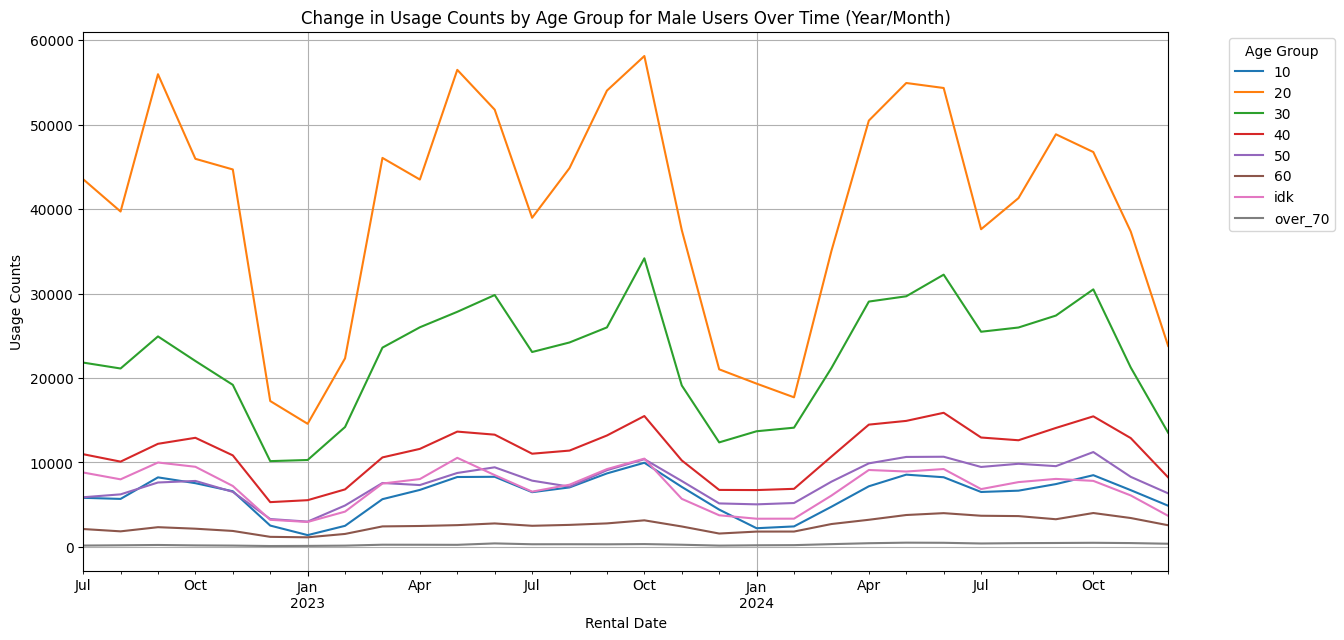

In [64]:
# Filter the data to include only male users again
data_males_only = data_final[data_final['성별'] == 'M']

# Create a pivot table for males only with the corrected date format
pivot_table_males_corrected = data_males_only.pivot_table(index='대여일자', columns='연령대코드', values='이용건수', aggfunc='sum')

# Plotting the result for males only with corrected dates and English annotations
pivot_table_males_corrected.plot(kind='line', figsize=(14, 7))
plt.title('Change in Usage Counts by Age Group for Male Users Over Time (Year/Month)')
plt.xlabel('Rental Date')
plt.ylabel('Usage Counts')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


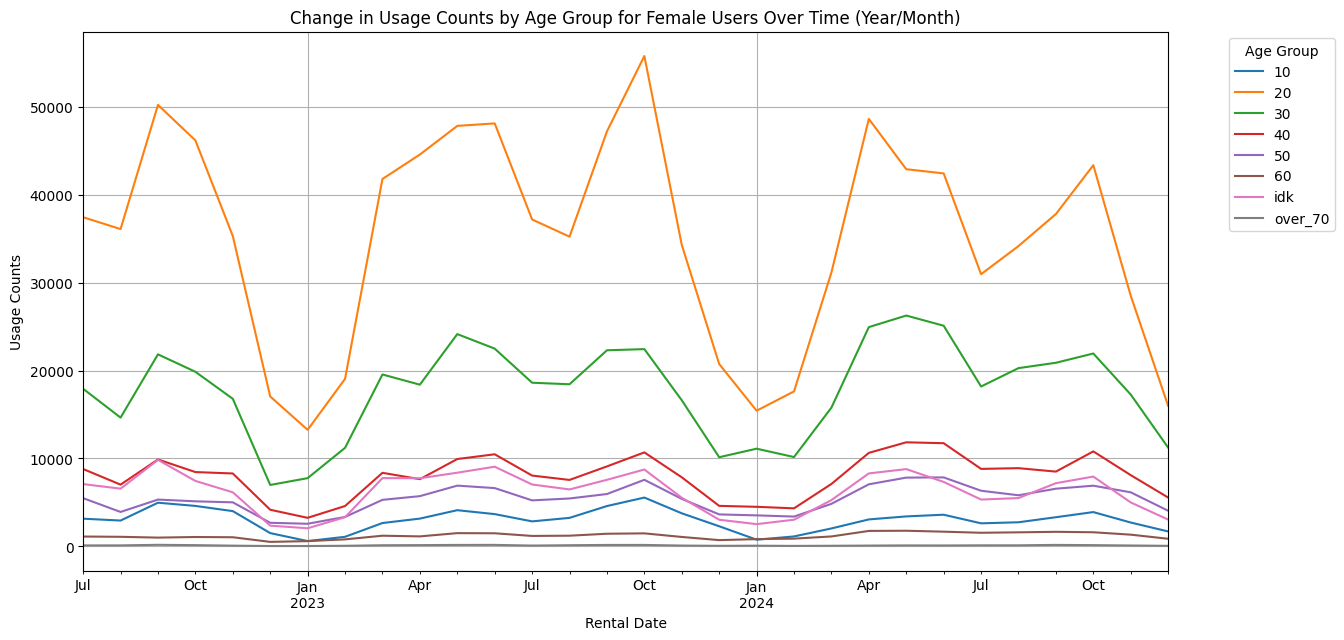

In [65]:
# Filter the data to include only female users ('F')
data_females_only = data_final[data_final['성별'] == 'F']

# Create a pivot table for females only with the updated age group labels
pivot_table_females = data_females_only.pivot_table(
    index='대여일자', 
    columns='연령대코드', 
    values='이용건수', 
    aggfunc='sum'
)

# Plotting the result for females only
pivot_table_females.plot(kind='line', figsize=(14, 7))
plt.title('Change in Usage Counts by Age Group for Female Users Over Time (Year/Month)')
plt.xlabel('Rental Date')
plt.ylabel('Usage Counts')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


광진구 인구 변화 분석

In [67]:
file_f_path = "C:/T/data/인구/광진구_f.csv"
file_m_path = "C:/T/data/인구/광진구_m.csv"

# 데이터 로드
df_f = pd.read_csv(file_f_path)
df_m = pd.read_csv(file_m_path)

# 데이터 확인
df_f.head(), df_m.head()


(       연도    2015    2016    2017    2018    2019    2020    2021    2022  \
 0  여    자  191744  190853  191653  191536  190055  187109  175473  173962   
 1    0~ 4    6568    6328    6005    5659    5041    4260    3824    3431   
 2    5~ 9    6345    6256    6094    5991    5884    5671    5282    4869   
 3   10~14    6821    6516    6546    6355    6105    6034    5877    5706   
 4   15~19   10378    9752    9061    8599    8152    7169    6544    6428   
 
      2023    2024  
 0  183618  180520  
 1    3252    2683  
 2    4493    4637  
 3    5623    5567  
 4    6964    5744  ,
          연도    2015    2016    2017    2018    2019    2020    2021    2022  \
 0    남    자  183436  181251  180645  179527  176917  173000  163518  161751   
 1     0~ 4세    6915    6779    6346    5919    5266    4459    4017    3618   
 2      5~ 9    6652    6485    6483    6366    6238    5865    5518    5163   
 3     10~14    7286    6891    6841    6611    6377    6395    6158    5970   
 4 

남여 통합

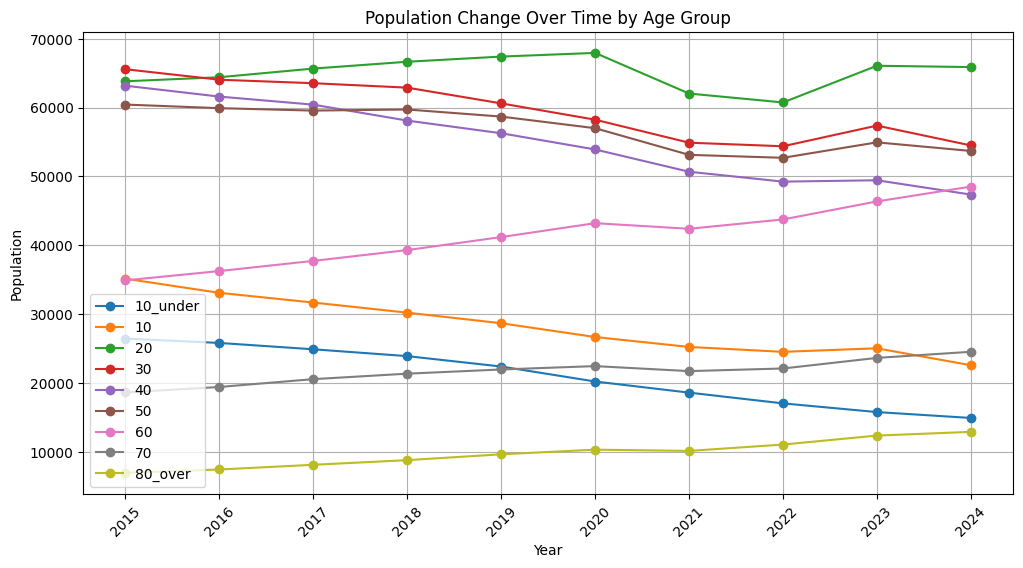

In [70]:
# 연령대 컬럼 통일을 위해 문자열 정리
df_f.iloc[:, 0] = df_f.iloc[:, 0].str.replace(" ", "").str.replace("여자", "총인구")
df_m.iloc[:, 0] = df_m.iloc[:, 0].str.replace(" ", "").str.replace("남자", "총인구").str.replace("세", "")

# 연령대 범위 재정의 (남녀 동일 기준 적용)
age_groups = {
    "10_under": ["0~4", "5~9"],
    "10": ["10~14", "15~19"],
    "20": ["20~24", "25~29"],
    "30": ["30~34", "35~39"],
    "40": ["40~44", "45~49"],
    "50": ["50~54", "55~59"],
    "60": ["60~64", "65~69"],
    "70": ["70~74", "75~79"],
    "80_over": ["80~84", "85~"]
}

# 연령대별 데이터 합산 함수
def aggregate_age_groups(df, age_groups):
    df = df.set_index(df.columns[0])  # 연령을 인덱스로 설정
    aggregated = {}
    for group, ages in age_groups.items():
        valid_ages = [age for age in ages if age in df.index]
        aggregated[group] = df.loc[valid_ages].sum()
    return pd.DataFrame(aggregated)

# 여성, 남성 데이터 변환
df_f_age = aggregate_age_groups(df_f, age_groups)
df_m_age = aggregate_age_groups(df_m, age_groups)

# 남녀 합산 데이터
df_total_age = df_f_age + df_m_age

# 그래프 그리기
plt.figure(figsize=(12, 6))
for group in df_total_age.columns:
    plt.plot(years, df_total_age[group], marker="o", label=group)

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Change Over Time by Age Group")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


남여 분리

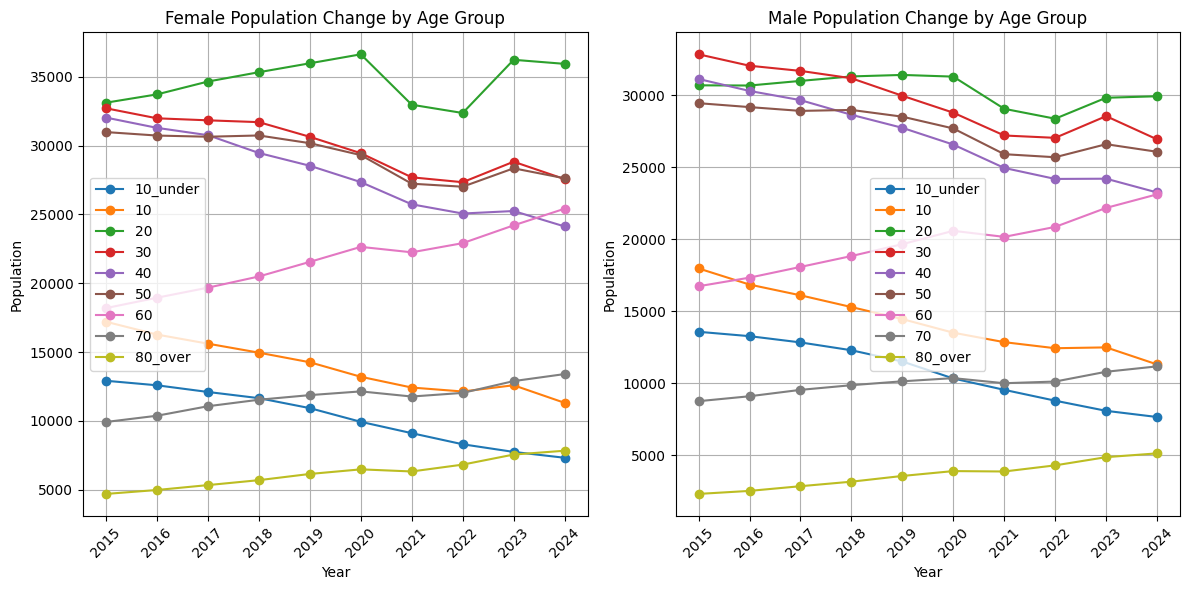

In [71]:
# 그래프 그리기 - 남녀 분리
plt.figure(figsize=(12, 6))

# 여성 그래프
plt.subplot(1, 2, 1)
for group in df_f_age.columns:
    plt.plot(years, df_f_age[group], marker="o", label=group)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Female Population Change by Age Group")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# 남성 그래프
plt.subplot(1, 2, 2)
for group in df_m_age.columns:
    plt.plot(years, df_m_age[group], marker="o", label=group)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Male Population Change by Age Group")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


월별 이용 분석

In [72]:
bike_rental_data = pd.read_csv('C:/T/data/광진구_대여.csv')

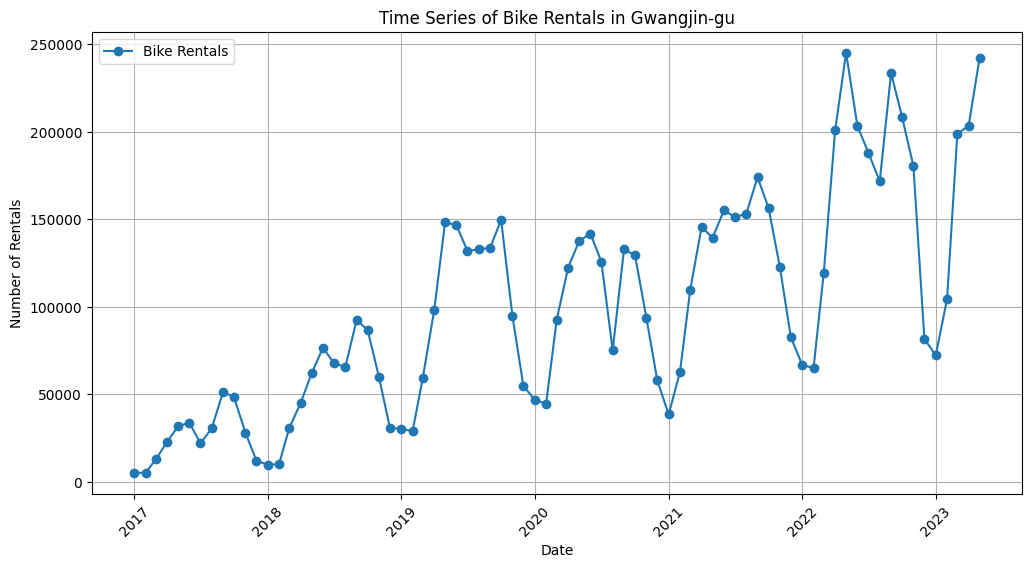

In [73]:
# 데이터 정리: ',' 제거 및 숫자형으로 변환
bike_rental_data['광진구'] = bike_rental_data['광진구'].str.replace(',', '').astype(float)

# '월' 열에서 '소계' 데이터 제거 및 숫자형으로 변환
bike_rental_data = bike_rental_data[bike_rental_data['월'] != '소계']
bike_rental_data['월'] = bike_rental_data['월'].str.extract('(\d+)').astype(int)

# '년'과 '월'을 합쳐 datetime 형식으로 변환
bike_rental_data['날짜'] = pd.to_datetime(
    bike_rental_data['년'].astype(str) + '-' + bike_rental_data['월'].astype(str) + '-01'
)

# 시간에 따른 이용 수 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(bike_rental_data['날짜'], bike_rental_data['광진구'], marker='o', label='Bike Rentals')

plt.title('Time Series of Bike Rentals in Gwangjin-gu')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()


따릉이 대여소 설치

In [ ]:
rental_station_data = pd.read_csv('c:/T/data/광진구_대여소정보.csv')

In [78]:
import folium
# 광진구 중심 좌표 설정
gwangjin_center = [37.548, 127.085]

# 지도 생성
gwangjin_map = folium.Map(location=gwangjin_center, zoom_start=13)

# 대여소 데이터를 지도에 추가
for _, row in rental_station_data.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['보관소명'],
        tooltip=row['보관소명']
    ).add_to(gwangjin_map)

# 지도 출력
gwangjin_map


In [83]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# 연도별 색상 매핑을 위한 컬러맵 생성
years = rental_station_data['설치시기'].str[:4].astype(int)  # 설치 연도 추출
unique_years = sorted(years.unique())  # 고유한 연도 정렬
colormap = cm.get_cmap('viridis', len(unique_years))  # Viridis 컬러맵 사용
year_color_map = {year: mcolors.to_hex(colormap(i)) for i, year in enumerate(unique_years)}

# 기존 지도에 연도별 색상 반영하여 대여소 추가
for _, row in rental_station_data.iterrows():
    install_year = int(row['설치시기'][:4])  # 설치 연도 추출
    color = year_color_map.get(install_year, 'gray')  # 연도별 색상 선택

    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=6,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{row['보관소명']}<br>설치: {row['설치시기']}",
        tooltip=row['보관소명']
    ).add_to(gwangjin_map)

gwangjin_map

C:\Users\peter\AppData\Local\Temp\ipykernel_21356\2326571752.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', len(unique_years))  # Viridis 컬러맵 사용


In [85]:
# 기존 지도에서 기본 Marker 제거 후 연도별 색상 반영하여 대여소 추가
gwangjin_map = folium.Map(location=gwangjin_center, zoom_start=13)  # 기존 Marker 제거한 새 지도 생성

for _, row in rental_station_data.iterrows():
    install_year = int(row['설치시기'][:4])  # 설치 연도 추출
    color = year_color_map.get(install_year, 'gray')  # 연도별 색상 선택

    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=6,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{row['보관소명']}<br>설치: {row['설치시기']}",
        tooltip=row['보관소명']
    ).add_to(gwangjin_map)

gwangjin_map


In [ ]:
# 코드 실행 상태가 리셋되었으므로 파일을 다시 로드
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 파일 경로
rental_station_file = "/mnt/data/광진구_대여소정보.csv"
rental_data_file = "/mnt/data/20.csv"

# 대여소 위치 데이터 로드
df_rental_stations = pd.read_csv(rental_station_file, encoding='cp949')

# 대여소별 거치수량 데이터 로드
df_rental_data = pd.read_csv(rental_data_file, encoding='cp949')

# 데이터 확인
df_rental_stations.head(), df_rental_data.head()
